In [1]:
import graphviz as gv

# Undirected graph

In [2]:
gu = gv.Graph(format='svg')
gu.node('A')
gu.node('B')
gu.edge('A', 'B')

In [4]:
print(gu.source)

graph {
	A
	B
		A -- B
}


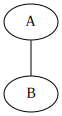

In [11]:
gu.render(filename='graphs/g1')
gu

# Directed graph

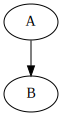

In [26]:
gd = gv.Digraph(format='svg')
gd.node('A')
gd.node('B')
gd.edge('A', 'B')
gd.render('graphs/g2')
gd

# Adding nodes and edges efficiently

In [14]:
def add_nodes(graph, nodes):
    for n in nodes:
        if isinstance(n, tuple):
            graph.node(n[0], **n[1])
        else:
            graph.node(n)
    return graph

def add_edges(graph, edges):
    for e in edges:
        if isinstance(e[0], tuple):
            graph.edge(*e[0], **e[1])
        else:
            graph.edge(*e)
    return graph

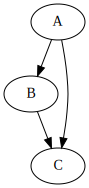

In [20]:
add_edges(add_nodes(gv.Digraph(format='svg'),['A', 'B', 'C']),
          [('A', 'B'), ('A', 'C'), ('B', 'C')])

# Labelling

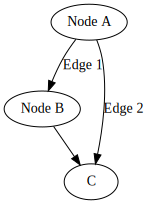

In [19]:
add_edges(add_nodes(gv.Digraph(format='svg'),
                    [('A', {'label': 'Node A'}),
                     ('B', {'label': 'Node B'}),
                      'C']),
          [(('A', 'B'), {'label': 'Edge 1'}),
           (('A', 'C'), {'label': 'Edge 2'}),
            ('B', 'C')])

# Styling

In [27]:
def apply_styles(graph, styles):
    graph.graph_attr.update(('graph' in styles and styles['graph']) or {})
    graph.node_attr.update(('nodes' in styles and styles['nodes']) or {})
    graph.edge_attr.update(('edges' in styles and styles['edges']) or {})
    return graph

In [28]:
graph=add_edges(add_nodes(gv.Digraph(format='svg'),
                          [('A', {'label': 'Node A'}),
                           ('B', {'label': 'Node B'}),
                            'C']),
                [(('A', 'B'), {'label': 'Edge 1'}),
                 (('A', 'C'), {'label': 'Edge 2'}),
                  ('B', 'C')])
styles={'graph': {'label': 'A Fancy Graph',
                  'fontsize': '16',
                  'fontcolor': 'white',
                  'bgcolor': '#333333',
                  'rankdir': 'BT',
                  },
        'nodes': {'fontname': 'Helvetica',
                  'shape': 'hexagon',
                  'fontcolor': 'white',
                  'color': 'white',
                  'style': 'filled',
                  'fillcolor': '#006699',
                  },
        'edges': {
                  'style': 'dashed',
                  'color': 'white',
                  'arrowhead': 'open',
                  'fontname': 'Courier',
                  'fontsize': '12',
                  'fontcolor': 'white',
                  }
        }

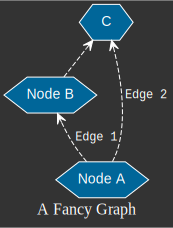

In [29]:
apply_styles(g,styles)

# Merging graphs

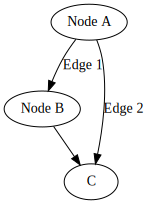

In [30]:
gA=add_edges(add_nodes(gv.Digraph(format='svg'),
                       [('A', {'label': 'Node A'}),
                        ('B', {'label': 'Node B'}),
                         'C']),
             [(('A', 'B'), {'label': 'Edge 1'}),
              (('A', 'C'), {'label': 'Edge 2'}),
               ('B', 'C')])
gA

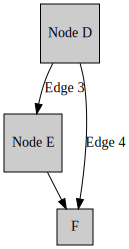

In [31]:
gB=apply_styles(add_edges(add_nodes(gv.Digraph(format='svg'),
                                    [('D', {'label': 'Node D'}),
                                     ('E', {'label': 'Node E'}),
                                      'F']),
                          [(('D', 'E'), {'label': 'Edge 3'}),
                           (('D', 'F'), {'label': 'Edge 4'}),
                            ('E', 'F')]),
                {'nodes': {'shape': 'square',
                           'style': 'filled',
                           'fillcolor': '#cccccc',
                           }
                 })
gB

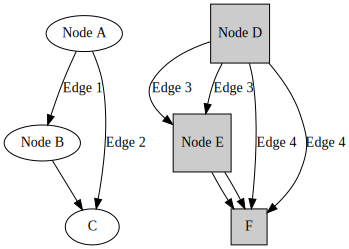

In [33]:
gA.subgraph(gB)
gA

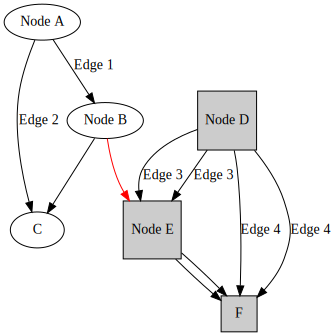

In [34]:
gA.edge('B', 'E', color='red', weight='2')
gA